In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
%matplotlib inline

In [10]:
# Read the data from file
# file is as same locaton where python file is
data = pd.read_csv("house.csv")


In [11]:
# Information about data structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
SNO            7 non-null int64
Square_Feet    7 non-null int64
Price          7 non-null int64
dtypes: int64(3)
memory usage: 248.0 bytes


In [12]:
# Top 10 rows
data.head(20)

,SNO,Square_Feet,Price
0,1,150,6450
1,2,200,7450
2,3,250,8450
3,4,300,9450
4,5,350,11450
5,6,400,15450
6,7,600,18450


In [13]:
# Initialize the linear regression class.
regressor = linear_model.LinearRegression()


In [14]:
# We're using Square_Feet' as  predictor, and making predictions for 'Price'.
# The predictors need to be in a dataframe.
# We pass in a list when we select predictor columns from "data" to force pandas not to generate a series.
predictors = data[["Square_Feet"]]
to_predict = data["Price"]


In [15]:
# Train the model using the training set
regressor.fit(predictors, to_predict)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
# Check R-Squared
regressor.score(predictors, to_predict)

0.944668586035943

In [17]:
#Equation coefficient and Intercept
print('Coefficient: \n', regressor.coef_)
print('Intercept: \n', regressor.intercept_)

Coefficient: 
 [28.77659574]
Intercept: 
 1771.8085106382969


In [20]:
#Predict Output. lets say we want to predict the house price whose square_feet area is 700
a = np.array(600)

print(a)


600


In [21]:
print(a.reshape(-1,1))


[[600]]


In [22]:
predicted= regressor.predict(a.reshape(-1,1))

In [23]:
print(predicted)

[19037.76595745]


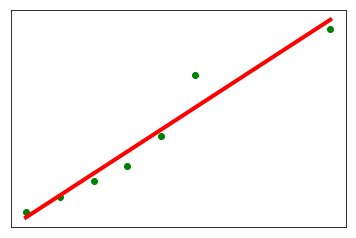

In [11]:
plt.scatter(predictors,to_predict,color='green')

plt.plot(predictors,regressor.predict(predictors),color='red',
         linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)



In [25]:
# Convert into polynomial features
X_train_poly = poly_features.fit_transform(predictors)

# Initialize model
poly_regression_model = linear_model.LinearRegression()

poly_regression_model.fit(X_train_poly, to_predict)

# Check trained model y-intercept
print(poly_regression_model.intercept_)

# Check trained model coefficients
print(poly_regression_model.coef_)

704.2326783160206
[ 0.00000000e+00  3.54926226e+01 -8.90732304e-03]


In [26]:
poly_regression_model.score(X_train_poly, to_predict)

0.9466458413238263

ValueError: Expected 2D array, got 1D array instead:
array=[10].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

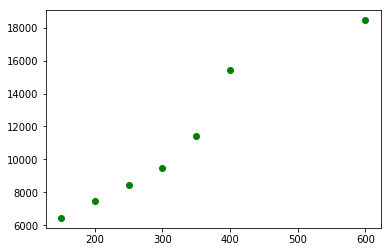

In [35]:
plt.scatter(predictors,to_predict,color='green')
X_PRED = np.linspace(100,10000,num=10)
plt.plot(X_PRED,poly_regression_model.predict(np.shape(X_PRED)),color='red',
         linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
# using mtcars
from ggplot import mtcars
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

A data frame with 32 observations on 11 variables.

mpg	     - Miles/(US) gallon

cyl	     - Number of cylinders

disp	 - Displacement (cu.in.)

hp	     - Gross horsepower

drat	 - Rear axle ratio

wt	     - Weight (1000 lbs)

qsec	 - 1/4 mile time

vs	     - V/S

am	     - Transmission (0 = automatic, 1 = manual)

gear	 - Number of forward gears

carb	 - Number of carburetors

In [16]:
mtcars.head(10)

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [17]:
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
name    32 non-null object
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


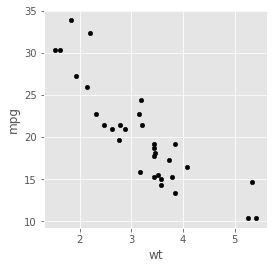

In [18]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(4,4),
           color="black")

In [19]:

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = mtcars[["wt"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

37.28512616734204
[-5.34447157]


The best fit line is:

mpg = 37.2851 - 5.3445*wt

In [20]:
regression_model.score(X = mtcars[["wt"]], 
                       y = mtcars["mpg"])

0.7528327936582646

In this case, car weight explains roughly 75% of the variance in mpg.

In [22]:
# Prediction

train_prediction = regression_model.predict(X = mtcars[["wt"]])

print(train_prediction)

[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


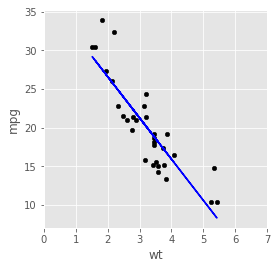

In [23]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(4,4),
           color="black",
           xlim = (0,7))

# Plot regression line
plt.plot(mtcars["wt"],      # Explanitory variable
         train_prediction,  # Predicted values
         color="blue")

as car weight increases we would expect fuel economy to decline.

In [44]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

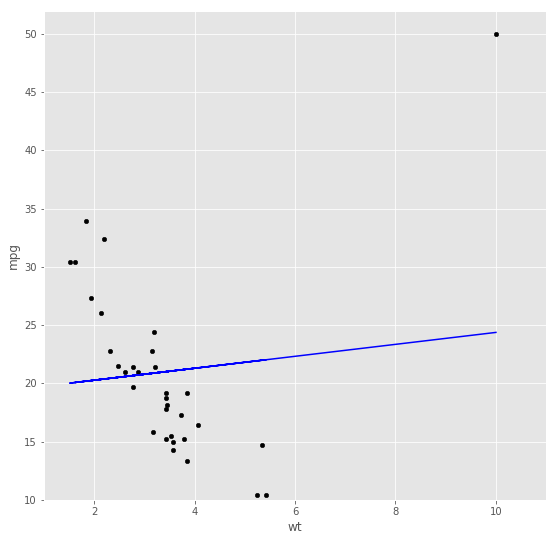

In [45]:
# Effect of Outliers

mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = mtcars_subset.append(super_car)

# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the new_cars data
regression_model.fit(X = pd.DataFrame(new_cars["wt"]), 
                     y = new_cars["mpg"])

train_prediction2 = regression_model.predict(X = pd.DataFrame(new_cars["wt"]))

# Plot the new model
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue")

# Polynomial regression

In [108]:
# Initialize model
poly_model = linear_model.LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)

# Convert into polynomial features
X_train_poly = poly_features.fit_transform(np.array(data["Price"].reshape(-1,1))

print(X_train_poly)

# Make a DataFrame of predictor variables
#predictors = pd.DataFrame([mtcars["wt"],           # Include weight
#                           mtcars["wt"]**2]).T     # Include weight squared
#
#predictors.head(3)



[[ 1.        2.62      6.8644  ]
 [ 1.        2.875     8.265625]
 [ 1.        2.32      5.3824  ]
 [ 1.        3.215    10.336225]
 [ 1.        3.44     11.8336  ]
 [ 1.        3.46     11.9716  ]
 [ 1.        3.57     12.7449  ]
 [ 1.        3.19     10.1761  ]
 [ 1.        3.15      9.9225  ]
 [ 1.        3.44     11.8336  ]
 [ 1.        3.44     11.8336  ]
 [ 1.        4.07     16.5649  ]
 [ 1.        3.73     13.9129  ]
 [ 1.        3.78     14.2884  ]
 [ 1.        5.25     27.5625  ]
 [ 1.        5.424    29.419776]
 [ 1.        5.345    28.569025]
 [ 1.        2.2       4.84    ]
 [ 1.        1.615     2.608225]
 [ 1.        1.835     3.367225]
 [ 1.        2.465     6.076225]
 [ 1.        3.52     12.3904  ]
 [ 1.        3.435    11.799225]
 [ 1.        3.84     14.7456  ]
 [ 1.        3.845    14.784025]
 [ 1.        1.935     3.744225]
 [ 1.        2.14      4.5796  ]
 [ 1.        1.513     2.289169]
 [ 1.        3.17     10.0489  ]
 [ 1.        2.77      7.6729  ]
 [ 1.     

In [109]:
#X_train_poly[2:5]

In [110]:
# Train the model using the new_cars data
poly_model.fit(X = X_train_poly, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = X_train_poly, 
                 y = mtcars["mpg"])

Model intercept
49.93081094945183
Model Coefficients
[  0.         -13.38033708   1.17108689]


0.8190613581384093

# PREDICTION

In [127]:

predict_for = 4.5

predict_for_transform = poly_features.transform(np.array(predict_for).reshape(-1,1))
poly_model.predict(predict_for_transform)

array([13.43380367])

Including the weight squared term appears to improve the model's performance because the R-squared increased from 0.75 to 0.8190. It should be noted, however, that adding more variables to a linear regression model can never cause R-squared to decrease, so we only want to add variables if there is a substantial improvement in performance.

In [117]:
#print(np.arange(1.5, 5.5, .1))
#np.array(mtcars["wt"]).reshape(-1,1)

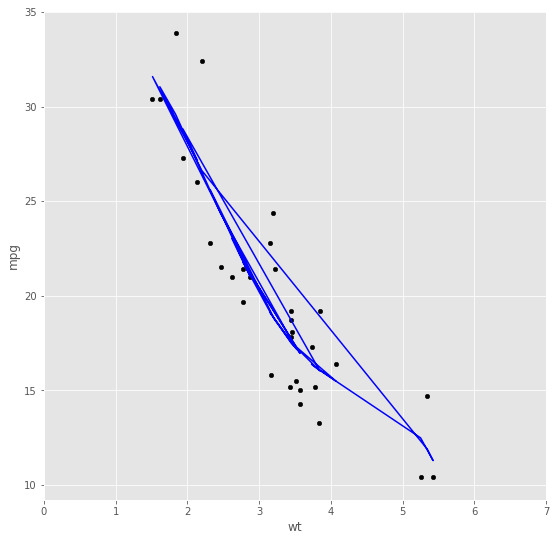

In [91]:
mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(mtcars.wt,   # X-axis range
         y_values,          # Predicted values
         color="blue")

Since the RMSE of the quadratic model is lower than the old one and the adjusted R-squared is higher, it is probably a better model. We do, however, have to be careful about overfitting the training data.
Overfitting describes a situation where our model fits the data we use to create it (training data) too closely, resulting in poor generalization to new data. This is why we generally don't want to use training data to evaluate a model: it gives us a biased, usually overly optimistic evaluation. One of the strengths of first and second order linear regression is that they are so simple, they are unlikely to overfit data very much. The more complex the model we create and the more freedom it has to fit the training data, the greater risk we run of overfitting. For example, we could keep including more polynomial terms in our regression model to fit the training data more closely and achieve lower RMSE scores against the training set, but this would almost certainly not generalize well to new data.

In [103]:
#mtcars.wt

In [104]:
#np.array(mtcars.wt).reshape(-1,1)

# Multiple Linear regression

In [128]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Train the model using the mtcars data
multi_reg_model.fit(X = mtcars.ix[:,["wt","hp"]], 
                     y = mtcars["mpg"])

# Check trained model y-intercept
print(multi_reg_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print(multi_reg_model.coef_)

# Check R-squared
multi_reg_model.score(X = mtcars.ix[:,["wt","hp"]], 
                      y = mtcars["mpg"])

37.227270116447215
[-3.87783074 -0.03177295]


/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """
/Users/rajnishechauhan/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


0.8267854518827914

In [129]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])


print('Score')
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check R-squared
print("R-Squared")
# Check RMSE
RMSE = mean_squared_error(multi_reg_model.predict(poly_predictors), mtcars["mpg"])**0.5

print(RMSE)

print('R-Sq')
print(r2_score(multi_reg_model.predict(poly_predictors), mtcars["mpg"]))

Score
0.8907279549670641
R-Squared
1.9609108134176991
R-Sq
0.8773227623276065
